In [2]:
import matplotlib.pyplot as plt
import fastf1.plotting
import fastf1 as ff1

In [3]:
ff1.Cache.enable_cache('cache')
ff1.plotting.setup_mpl()

In [4]:
session = ff1.get_session(2023, 'Bahrain Grand Prix', 'Q')
session.load()

core           INFO 	Loading data for Bahrain Grand Prix - Qualifying [v2.3.0]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
C:\Users\Ricky\AppData\Local\Programs\Python\Python311\Lib\site-packages\fastf1\core.py:1492: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for key, value in row.iteritems():
C:\Users\Ricky\AppData\Local\Programs\Python\Python311\Lib\site-packages\fastf1\core.py:1492: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for key, value in row.iteritems():
C:\Users\Ricky\AppData\Local\Programs\Python\Python311\Lib\site-packages\fastf1\core.py:1415: FutureWarning: In a futur

api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
api            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '11', '16', '55', '14', '63', '44', '18', '31', '27', '4', '77', '24', '22', '23', '2', '20', '81', '21', '10']


In [5]:
ver_lap = session.laps.pick_driver('VER').pick_fastest()
ham_lap = session.laps.pick_driver('NOR').pick_fastest()

In [6]:
ver_tel = ver_lap.get_car_data().add_distance()
ham_tel = ham_lap.get_car_data().add_distance()

C:\Users\Ricky\AppData\Local\Programs\Python\Python311\Lib\site-packages\fastf1\core.py:378: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data_slice.loc[:, 'Time'] = data_slice['SessionTime'] - start_time
C:\Users\Ricky\AppData\Local\Programs\Python\Python311\Lib\site-packages\fastf1\core.py:378: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data_slice.loc[:, 'Time'] = data_slice['SessionTime'] - start_time


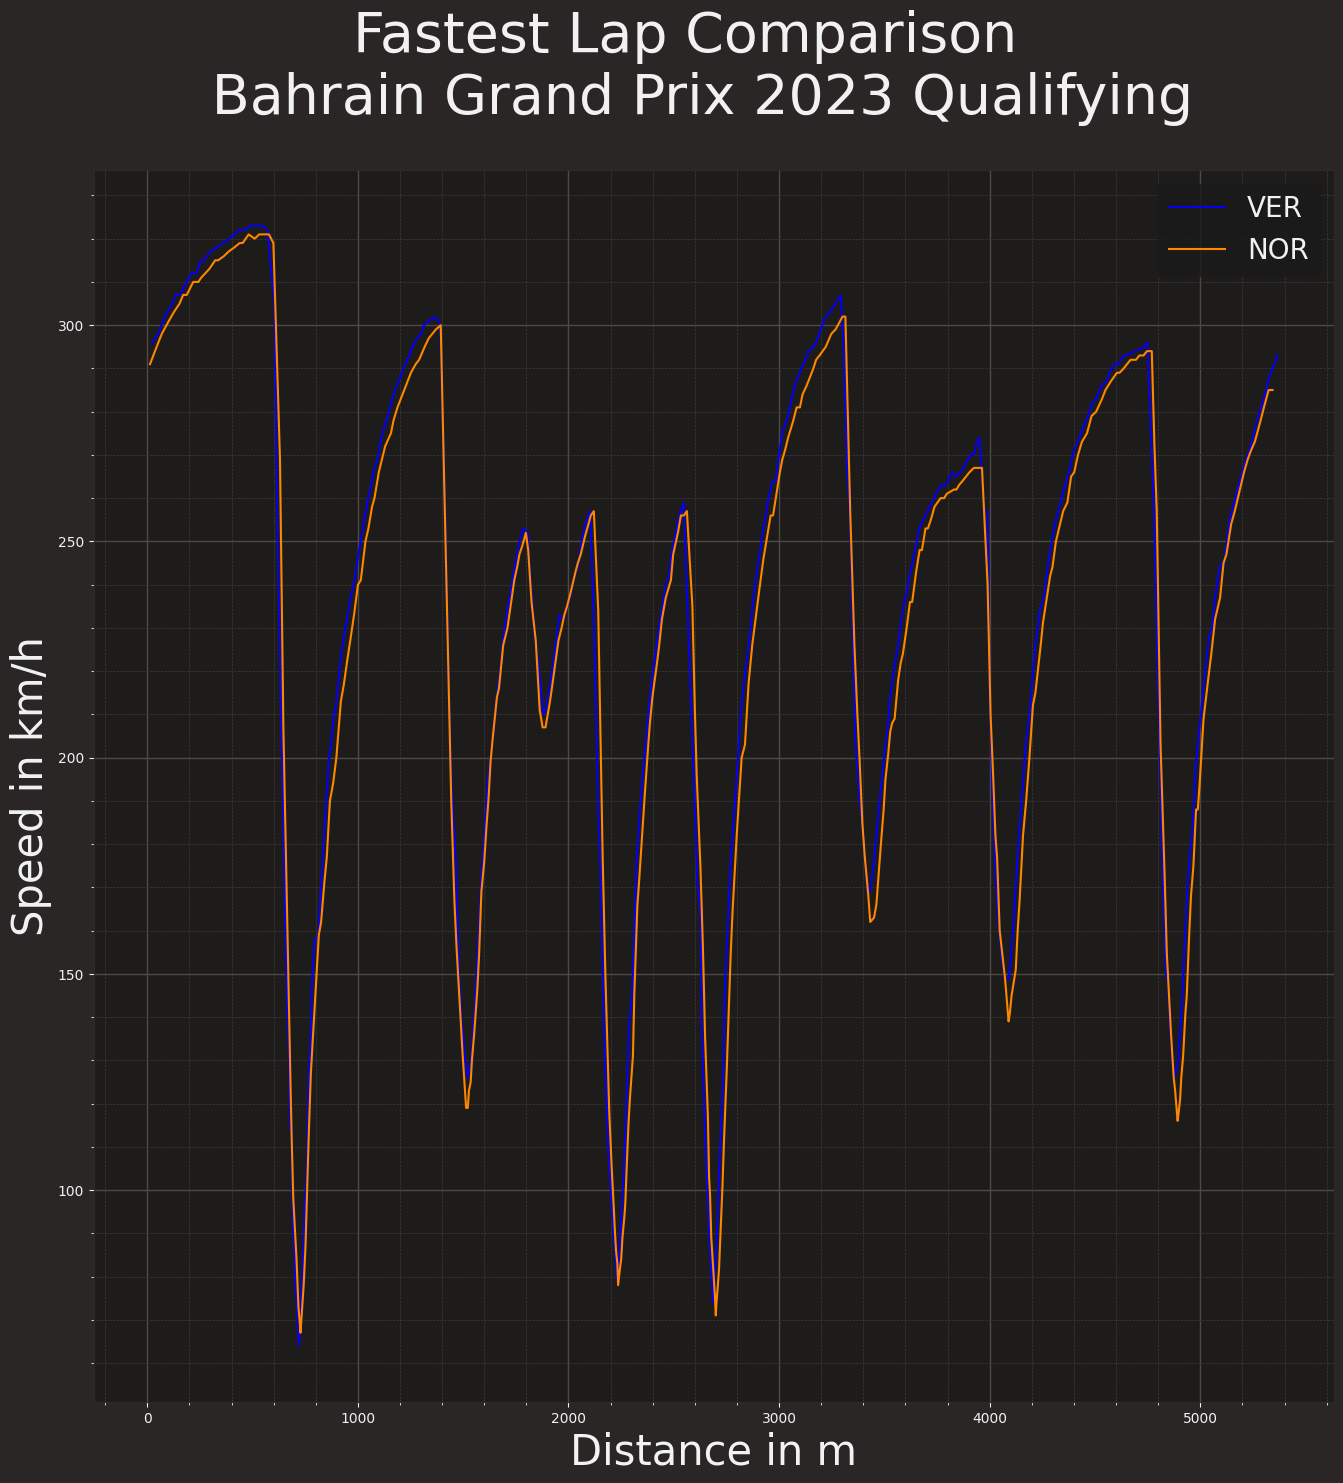

In [7]:
rbr_color = fastf1.plotting.team_color('RBR')
mer_color = fastf1.plotting.team_color('MCL')

plt.rcParams['figure.figsize'] = [16,16]
fig, ax = plt.subplots()
ax.plot(ver_tel['Distance'], ver_tel['Speed'], color=rbr_color, label='VER')
ax.plot(ham_tel['Distance'], ham_tel['Speed'], color=mer_color, label='NOR')

ax.set_xlabel('Distance in m', fontsize=30)
ax.set_ylabel('Speed in km/h', fontsize=30)

ax.legend(prop={"size":20})
plt.suptitle(f"Fastest Lap Comparison \n "
             f"{session.event['EventName']} {session.event.year} Qualifying", fontsize=40)

plt.show()